### Ejercicio 1 | Paridad

Empezamos con el problema XOR de la practica pasada

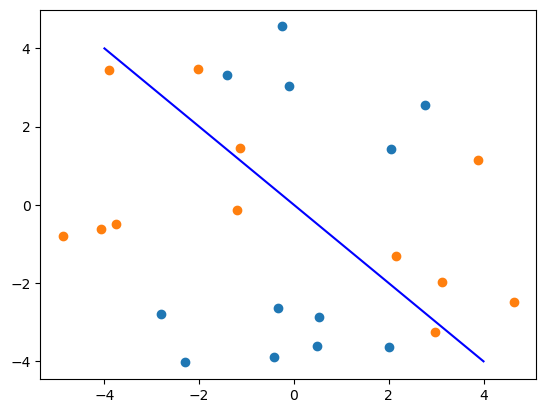

In [1]:
from matplotlib import pyplot as mpl
import numpy as np 
import os 
os.chdir('/home/kenetc/Documents/FCEyN/1Redes Neuronales/Datos/')
os.getcwd()
raw_data = open('p11_ej6.csv')
data = np.loadtxt(raw_data, delimiter=",",skiprows=1)
x = np.array(data)
z = x[:,-1:].copy()
x[:,-1] = 1
exs = []
eys = []
u = []
p = []
for i in range(24):
    if(z[i] == 1):
        exs.append(x[i][0]) 
        eys.append(x[i][1])
    else: 
        u.append(x[i][0])
        p.append(x[i][1])
mpl.plot(exs,eys,"o",u,p,'o',[4,-4],[-4,4],'b')
mpl.show()

In [358]:
class MLP: 
    def __init__(self,sizes): 
        self.S = sizes 
        self.L = len(self.S) # cantidad de capas ocultas + entrada y salida
        self.Y = []
        self.W = [] # inicializamos los pesos (N(0,0.5))
        for i in range(1,self.L): 
            (self.W).append(np.random.normal(0,0.1,(self.S[i-1]+1,self.S[i])))
        self.z = []
        self.dW = []
        self.Ers = []
    
    # Definimos funciones auxiliares para la activacion    
    def bias_add(self,V): 
        bias = np.ones((len(V),1))
        return np.hstack([V,bias])

    def bias_ex(self,V): 
        return V[:,:-1]
        
    # Activacion 
    def activacion(self,x):     
        self.Y = []
        y = x 
        for i in range(self.L-1): 
            if (i == self.L-1): 
                (self.Y).append( self.bias_add(y) )
                y = (self.Y)[i] @ (self.W)[i] 
            else: 
                (self.Y).append( self.bias_add(y) )
                y = np.tanh( (self.Y)[i] @ (self.W)[i] )
        (self.Y).append(y)
    
    def activ(self,x):
        y = list(x)
        for i in range(self.L-1): 
            y = list(y)
            y.append(1)
            y = np.tanh( y @ self.W[i] )
        return y
    
    def correccion(self,z,eta = 0.1):
        self.dW = []
        D = []
        E = z - (self.Y)[ self.L-1 ]
        # Estimacion 
        error = np.mean( np.square(E))
        dY = 1 - np.square( (self.Y)[self.L-1] )
        D.insert(0,E*dY)
        k = self.L - 2
        while k != -1:
            (self.dW).insert(0,eta * ((self.Y)[k]).T @ D[0])
            E = D[0] @ ((self.W)[k]).T
            dY = 1 - np.square((self.Y)[k])
            D.insert(0,self.bias_ex(E*dY))
            k -= 1
        return(error)
    def entrenamiento(self,x,z,eta=0.1,epoch_max=999):
        self.Ers = []
        #eta = 0.1
        error = 1
        #epoch_max = 999
        er_min = 1e-5
        epoch = 0  
        while (error > er_min) and (epoch < epoch_max): 
            self.activacion(x)
            error = self.correccion(z,eta)
            # Adaptacion 
            for i in range(len(self.W)): 
                (self.W)[i] += (self.dW)[i]
            epoch += 1
            (self.Ers).append(error)
        
    def mostrarGrafico(self): 
        mpl.plot(self.Ers,'r')
        mpl.show()

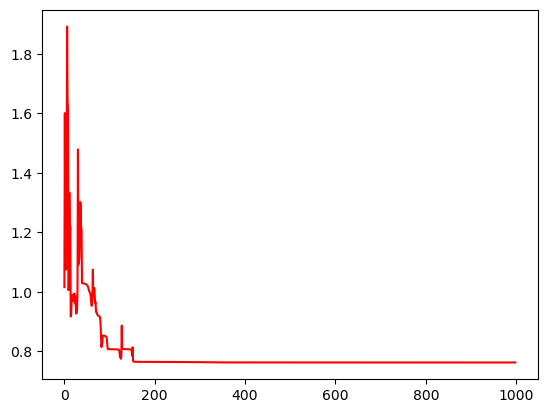

In [357]:
d = x[:,:2]
XOR = MLP([2,2,1])
XOR.entrenamiento(d,z)
XOR.mostrarGrafico()

### CASO 2 Variables de entrada

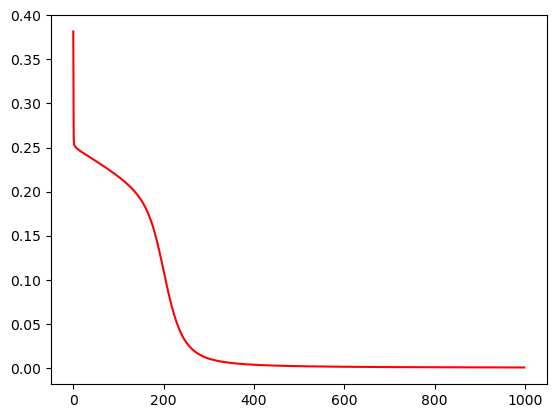

In [75]:
x = np.array([[1,0],[0,0],[1,1],[0,1]])
z = np.array([[1],[0],[0],[1]])
xor2 = MLP([2,3,1])
xor2.entrenamiento(x,z)
xor2.mostrarGrafico()

In [78]:
xor2.activ([1,1.1])

array([-0.15524856])

### CASO 8 variables de entrada

In [204]:
x = []
z = []
for i in range(40): 
    e = []
    suma = 0
    for j in range(8):
        a = np.random.randint(0,2)
        suma += a
        e.append(a)
    x.append(e)
    if suma % 2 == 1: 
        z.append([1])
    else:
        z.append([0])

In [154]:
xor3 = MLP([8,4,3,1])
xor3.entrenamiento(x,np.array(z),0.01,1999)

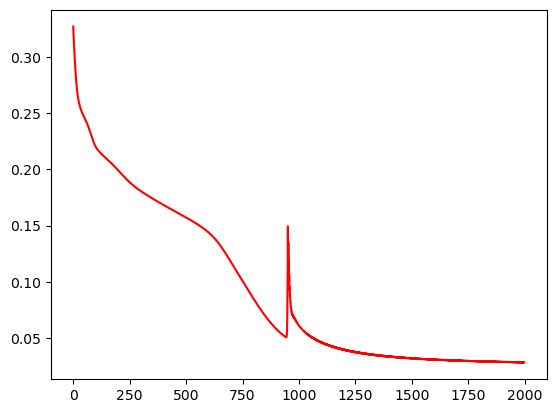

In [155]:
xor3.mostrarGrafico()

In [159]:
xor3.activ([0,1,1,1,1,0,0,1])

array([0.74665806])

### Ejercicio 2 | Aproximacion de funciones

In [2]:
def f(a,xs): 
    res = []
    for x in xs: 
        res.append( [np.sin(2*x*np.pi/5)/2 - np.sin(2*np.pi*x/3)/4 + np.sin(a*np.pi*x)/8  ])
    return res 

Primero probamos con valores a intervalos regulares

In [3]:
P = 100
x1 = np.linspace(-2*np.pi, 2*np.pi,P)
x = []
for i in x1: 
    x.append([i])
y1 = f(1,x1)

Vamos a usar a la sigmoide, como funcion de activacion en las todas las capaz menos la ultima debido a que la funcion toma valores mayores a 1 en modulo, por lo que usaremos la funcion lineal en la ultima capa. 

In [4]:
def sig(V): 
    res = []
    for x in V: 
        res.append(1/(1 + np.e**(-x)))
    return res
# Aproximacion de funciones
def bias_add(V): 
    bias = np.ones((len(V),1))
    return np.hstack([V,bias])

def bias_ex(V): 
    return V[:,:-1]

def activacion(x,W): 
    Y = []
    y = x
    for i in range(len(W)): 
        if (i == len(W)-1): 
            Y.append(bias_add(y))
            y = Y[i] @ W[i] 
        else: 
            Y.append(bias_add(y))
            y = sig( Y[i] @ W[i] )
    Y.append(y)
    return Y

def backpropagation(Y,z,eta): 
    dW = []
    D = []
    n = len(Y)
    E = z - Y[n-1]
    error = np.mean(np.square(z - Y[n-1]))
    D.insert(0,E)
    k = n-2
    while k != -1:
        dW.insert(0,eta * (Y[k]).T @ D[0])
        E = D[0] @ (W[k]).T
        dY = Y[k] - np.square(Y[k])
        D.insert(0,bias_ex(E*dY))
        k-=1
    return [dW,error]

Primero probamos con el modelo estocastico

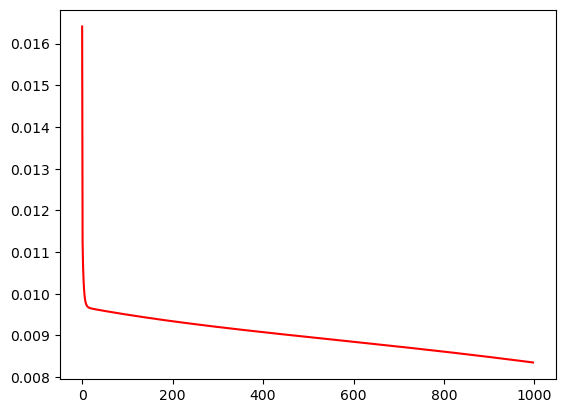

0.008351508041182044


In [9]:
W_1 = np.random.normal(0,0.5,(2,30))
W_2 = np.random.normal(0,0.5,(31,40))
W_3 = np.random.normal(0,0.5,(41,1))
W = [W_1,W_2,W_3]
eta = 0.001
B = 20
epoch = 1
epoch_max = 999
er_min = 1e-3
Ers = []
stocastic = np.random.permutation(P)
while (epoch < epoch_max): 
    e = 0
    for h in range(0,P,B):
        batch = stocastic[h:h+B]
        Xh = []
        Zh = []
        for i in batch: 
            Xh.append(x[i])
            Zh.append(y1[i])
        Yh = activacion(Xh,W)
        dW,error = backpropagation(Yh,Zh,eta)
        # Adatacion 
        for i in range(len(W)): 
            W[i] += dW[i]
        # Estimacion 
        e += error
    Ers.append(e/P)
    epoch += 1
mpl.plot(Ers,'r')
mpl.show()
print(min(Ers))

Aca probamos con mini-batch

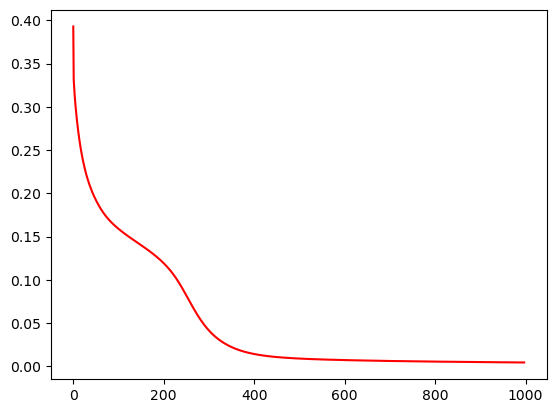

0.004600994741094167


In [10]:
W_1 = np.random.normal(0,0.5,(2,30))
W_2 = np.random.normal(0,0.5,(31,40))
W_3 = np.random.normal(0,0.5,(41,1))
W = [W_1,W_2,W_3]
eta = 0.05 
epoch = 1
epoch_max = 999
er_min = 1e-3
Ers = []
stocastic = np.random.permutation(P)
while (epoch < epoch_max): 
    e = 0
    for h in stocastic:
        Xh = x[h:h+1]
        Zh = y1[h:h+1]
        Yh = activacion(Xh,W)
        dW,error = backpropagation(Yh,Zh,eta)
        # Adatacion 
        for i in range(len(W)): 
            W[i] += dW[i]
        # Estimacion 
        e += error
    Ers.append(e/P)
    epoch += 1
mpl.plot(Ers,'r')
mpl.show()
print(min(Ers))

In [329]:
f(1,[1])

[[0.2590219072014671]]

In [330]:
f1.activ([1])

array([0.99999958])

In [332]:
y = x[0]
W = f1.W
for i in range(len(W)): 
    y = list(y)
    y.append(1)
    y = np.tanh( y @ W[i] )
    print(y)
print(y)

[-0.48838261 -0.16548972]
[0.59122097 0.99846252]
[0.99999972]
[0.99999972]


In [3]:
import numpy as np 
def sig(V): 
    res = []
    for x in V: 
        res.append(1/(1 + np.e**(-x)))
    return res

In [4]:
sig(np.array([1,2]))

[0.7310585786300049, 0.8807970779778823]